# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "?q=" + city + "&appid=" + weather_api_key + "&units=Imperial" 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | weno
Processing Record 4 of Set 1 | armacao de buzios
Processing Record 5 of Set 1 | stanley
Processing Record 6 of Set 1 | northam
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | nacala
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | san lawrenz
Processing Record 13 of Set 1 | general conesa
Processing Record 14 of Set 1 | cockburn town
Processing Record 15 of Set 1 | west island
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | port mathurin
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | rabigh
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | inarajan 

Processing Record 39 of Set 4 | tymovskoye
Processing Record 40 of Set 4 | masterton
Processing Record 41 of Set 4 | yemva
Processing Record 42 of Set 4 | peace river
Processing Record 43 of Set 4 | deneysville
Processing Record 44 of Set 4 | mersa matruh
Processing Record 45 of Set 4 | urangan
Processing Record 46 of Set 4 | supe
Processing Record 47 of Set 4 | sawakin
Processing Record 48 of Set 4 | chibougamau
Processing Record 49 of Set 4 | tazacorte
Processing Record 0 of Set 5 | uturoa
Processing Record 1 of Set 5 | balnearia
Processing Record 2 of Set 5 | nassau
Processing Record 3 of Set 5 | mapastepec
Processing Record 4 of Set 5 | dwarka
Processing Record 5 of Set 5 | jaru
Processing Record 6 of Set 5 | yershov
Processing Record 7 of Set 5 | seogwipo
City not found. Skipping...
Processing Record 8 of Set 5 | shingu
Processing Record 9 of Set 5 | vredendal
Processing Record 10 of Set 5 | qingyuan
Processing Record 11 of Set 5 | canela
Processing Record 12 of Set 5 | puerto baq

Processing Record 30 of Set 8 | vilyuchinsk
Processing Record 31 of Set 8 | sovetskaya gavan'
Processing Record 32 of Set 8 | faya-largeau
Processing Record 33 of Set 8 | ballina
Processing Record 34 of Set 8 | south bunbury
City not found. Skipping...
Processing Record 35 of Set 8 | constitucion
Processing Record 36 of Set 8 | christchurch
Processing Record 37 of Set 8 | moapa valley
Processing Record 38 of Set 8 | port blair
Processing Record 39 of Set 8 | kayenta
Processing Record 40 of Set 8 | kenora
Processing Record 41 of Set 8 | les anglais
Processing Record 42 of Set 8 | zhanaozen
Processing Record 43 of Set 8 | matane
Processing Record 44 of Set 8 | jorpeland
Processing Record 45 of Set 8 | nar'yan-mar
Processing Record 46 of Set 8 | girvan
Processing Record 47 of Set 8 | san jose village
City not found. Skipping...
Processing Record 48 of Set 8 | el calafate
Processing Record 49 of Set 8 | riviere-du-loup
Processing Record 0 of Set 9 | markovo
Processing Record 1 of Set 9 | t

Processing Record 17 of Set 12 | luba
Processing Record 18 of Set 12 | tangalle
Processing Record 19 of Set 12 | brezina
Processing Record 20 of Set 12 | cabedelo
Processing Record 21 of Set 12 | mkushi
Processing Record 22 of Set 12 | port glaud
City not found. Skipping...
Processing Record 23 of Set 12 | fallon
Processing Record 24 of Set 12 | rosetta
Processing Record 25 of Set 12 | kolonia
Processing Record 26 of Set 12 | colesberg
Processing Record 27 of Set 12 | qui nhon
Processing Record 28 of Set 12 | visakhapatnam
Processing Record 29 of Set 12 | smithers
Processing Record 30 of Set 12 | qarayeri
Processing Record 31 of Set 12 | piti village
Processing Record 32 of Set 12 | luchegorsk
Processing Record 33 of Set 12 | batie
Processing Record 34 of Set 12 | jurm
Processing Record 35 of Set 12 | aykhal
Processing Record 36 of Set 12 | saratamata
City not found. Skipping...
Processing Record 37 of Set 12 | puerto palomas
Processing Record 38 of Set 12 | hammerfest
Processing Recor

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,9.07,95,98,6.96,RU,1698082808
1,bethel,41.3712,-73.4140,61.20,60,0,11.50,US,1698082808
2,weno,7.4515,151.8468,78.75,94,75,0.00,FM,1698082809
3,armacao de buzios,-22.7469,-41.8817,80.76,79,58,21.92,BR,1698082809
4,stanley,54.8680,-1.6985,49.78,93,100,3.44,GB,1698082810


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,9.07,95,98,6.96,RU,1698082808
1,bethel,41.3712,-73.4140,61.20,60,0,11.50,US,1698082808
2,weno,7.4515,151.8468,78.75,94,75,0.00,FM,1698082809
3,armacao de buzios,-22.7469,-41.8817,80.76,79,58,21.92,BR,1698082809
4,stanley,54.8680,-1.6985,49.78,93,100,3.44,GB,1698082810


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

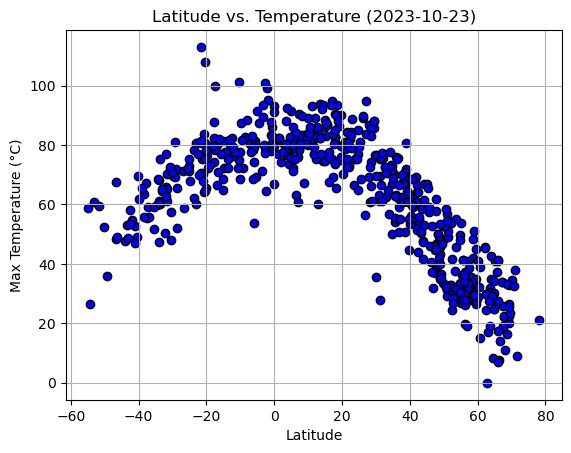

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
            marker='o', 
            color='blue', 
            edgecolor="black")
   

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.title('Latitude vs. Temperature (2023-10-23)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

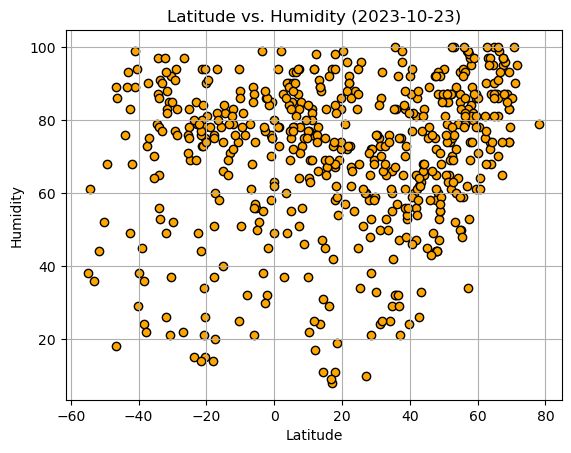

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
            marker='o', 
            color='orange', 
            edgecolor="black")
   

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity (2023-10-23)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

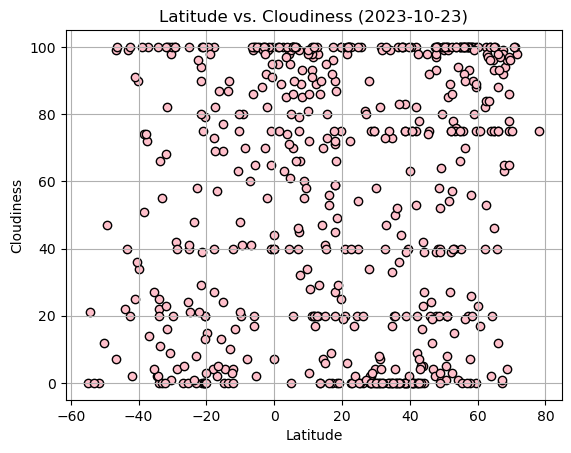

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
            marker='o', 
            color='pink', 
            edgecolor="black")
   

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness (2023-10-23)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

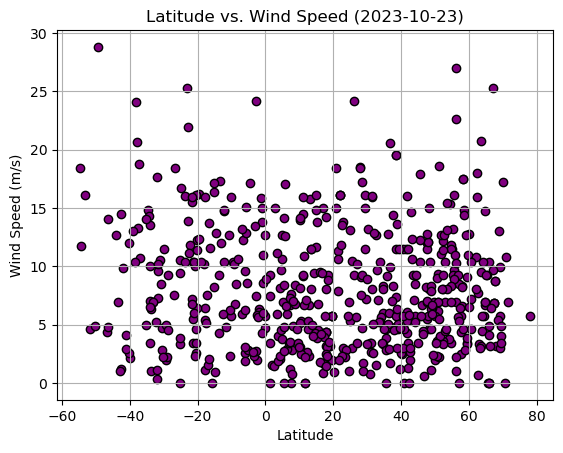

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
            marker='o', 
            color='purple', 
            edgecolor="black")
   

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Latitude vs. Wind Speed (2023-10-23)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def linear_regression(x, y, title, x_label, y_label, x_loc, y_loc):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

    # Create a regression line using the calculated slope and intercept
    regression_line = slope * np.array(x) + intercept

    # Create a scatter plot
    plt.scatter(x, y, marker='o', label='Data Points')

    # Plot the regression line
    plt.plot(x, regression_line, color='red', label='Regression Line')

    # Annotate the plot with the linear regression equation
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.annotate(line_eq, (x_loc, y_loc), color="red")
    
    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Add a legend
    plt.legend()
    
    print(f"The r value is: {rvalue}")

    # Display the plot
    plt.show()

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,9.07,95,98,6.96,RU,1698082808
1,bethel,41.3712,-73.4140,61.20,60,0,11.50,US,1698082808
2,weno,7.4515,151.8468,78.75,94,75,0.00,FM,1698082809
4,stanley,54.8680,-1.6985,49.78,93,100,3.44,GB,1698082810
5,northam,51.0333,-4.2167,56.61,87,100,9.35,GB,1698082810


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,armacao de buzios,-22.7469,-41.8817,80.76,79,58,21.92,BR,1698082809
7,nacala,-14.5428,40.6728,77.58,82,4,12.84,MZ,1698082811
8,ushuaia,-54.8000,-68.3000,58.66,38,0,18.41,AR,1698082811
9,adamstown,-25.0660,-130.1015,72.86,78,100,9.46,PN,1698082812
11,general conesa,-40.1000,-64.4333,69.60,29,90,11.97,AR,1698082813


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8884029142781059


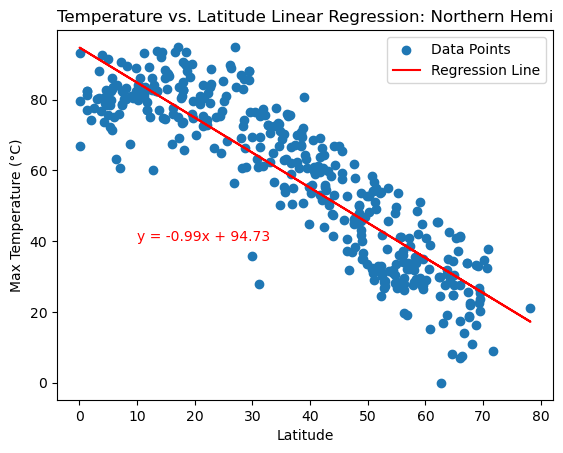

In [29]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Temperature vs. Latitude Linear Regression: Northern Hemi','Latitude', 'Max Temperature (°C)', 10, 40)

The r value is: 0.7205481657068299


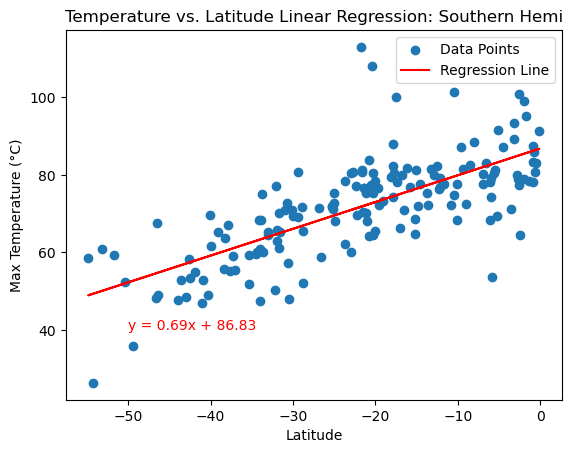

In [28]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Temperature vs. Latitude Linear Regression: Southern Hemi','Latitude', 'Max Temperature (°C)', -50, 40)

### Discussion about the linear relationship:

A significant relationship exists between Latitude and Max Temperature, as evidenced by the r-value.


**Negative Correlation (-0.66) in the Northern Hemisphere:**

In the northern hemisphere, the correlation coefficient is approximately -0.66. This negative correlation indicates the following:

- When latitude increases (moving away from the equator and toward the North Pole), the maximum temperature tends to decrease. In other words, as you move from lower latitudes (closer to the equator) to higher latitudes (closer to the North Pole) in the northern hemisphere, temperatures generally get cooler.

- Conversely, when latitude decreases (moving toward the equator), the maximum temperature tends to increase. Moving from higher latitudes to lower latitudes, you typically encounter warmer temperatures.

- The negative sign indicates an inverse relationship between latitude and temperature in the northern hemisphere. As one variable (latitude) increases, the other variable (temperature) decreases.

**Positive Correlation (0.87) in the Southern Hemisphere:**

In the southern hemisphere, the correlation coefficient is approximately 0.87. This positive correlation signifies the following:

- When latitude increases (moving away from the equator and toward the South Pole), the maximum temperature tends to increase. As you move from lower latitudes (closer to the equator) to higher latitudes (closer to the South Pole) in the southern hemisphere, temperatures generally become warmer.

- Conversely, when latitude decreases (moving toward the equator), the maximum temperature tends to decrease. Moving from higher latitudes to lower latitudes, you generally experience cooler temperatures.

- The positive sign indicates a direct relationship between latitude and temperature in the southern hemisphere. As one variable (latitude) increases, the other variable (temperature) also increases.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.19674286282280415


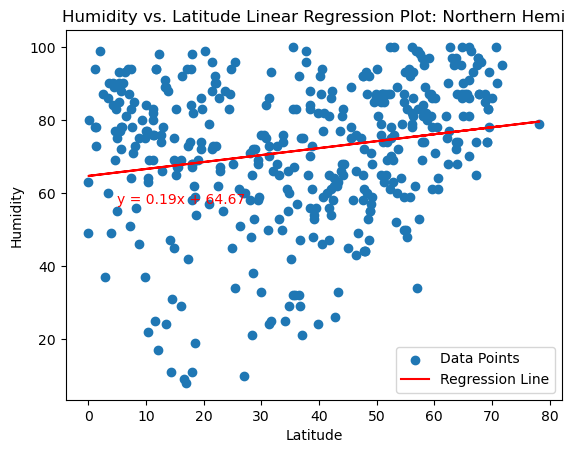

In [24]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],'Humidity vs. Latitude Linear Regression Plot: Northern Hemi' ,'Latitude', 'Humidity', 5, 57)

The r value is: 0.03826977481969771


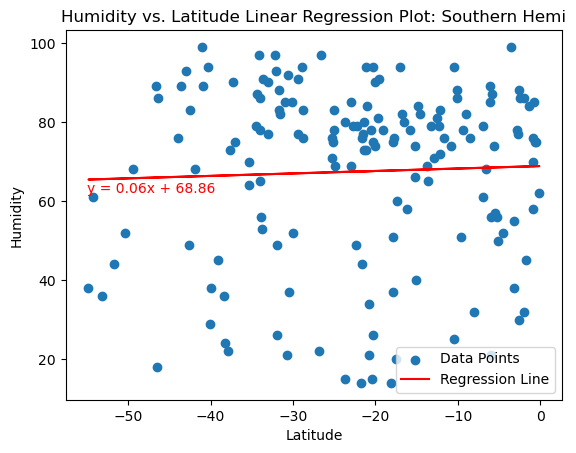

In [27]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],'Humidity vs. Latitude Linear Regression Plot: Southern Hemi' ,'Latitude', 'Humidity', -55, 62)

### Discussion about the linear relationship:

This data suggests that there is a lack of a substantial relationship between latitude and humidity levels as the connection between latitude and humidity appears to be quite weak.

- **Southern Hemisphere (r ≈ -0.02):**
The negative correlation coefficient indicates a very weak negative relationship between latitude and humidity in the southern hemisphere. However, the correlation is extremely close to zero, which suggests that there is almost no linear relationship between latitude and humidity in the southern hemisphere. In practical terms, this means that variations in latitude have a minimal impact on humidity levels in this hemisphere.

- **Northern Hemisphere (r ≈ 0.14):** 
The positive correlation coefficient suggests a weak positive relationship between latitude and humidity in the northern hemisphere. It suggests that on a broad scale, there is a minor tendency for humidity levels to increase as one moves away from the equator and towards higher latitudes in the northern hemisphere. However, it's important to emphasize that this correlation is weak and explains only a small fraction of the variability in humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.06732501083573028


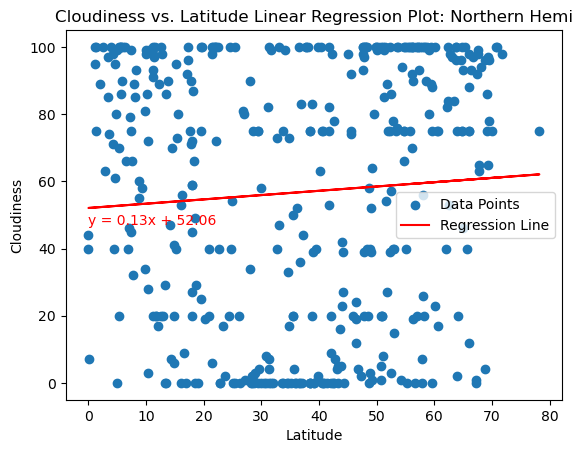

In [30]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],'Cloudiness vs. Latitude Linear Regression Plot: Northern Hemi' ,'Latitude', 'Cloudiness', 0, 47)

The r value is: 0.2401253358186625


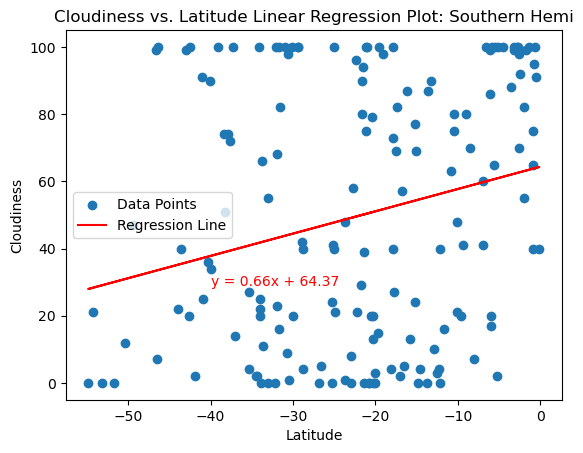

In [35]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],'Cloudiness vs. Latitude Linear Regression Plot: Southern Hemi' ,'Latitude', 'Cloudiness', -40, 29)

### Discussion about the linear relationship:

The r-values for the relationship between latitude and cloudiness are 0.125 in the southern hemisphere and 0.109 in the northern hemisphere. Here's what we can conclude based on these r-values:

- **Weak Positive Correlation:**
Both the southern and northern hemispheres exhibit weak positive correlations between latitude and cloudiness. In the southern hemisphere, the positive correlation suggests that as you move away from the equator (higher latitudes), there's a slight tendency for cloudiness to increase. In the northern hemisphere, a similar but slightly weaker positive correlation exists.

- **Low Magnitude:**
The r-values are relatively low, indicating that the strength of the relationship is weak. This means that while there's a positive trend, the variation in cloudiness explained by latitude is minimal.

- **Other Factors at Play:**
The low r-values suggest that latitude alone doesn't significantly influence cloudiness.The influence of other factors on cloudiness is likely more pronounced, making latitude a less prominent determinant of cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.19674286282280415


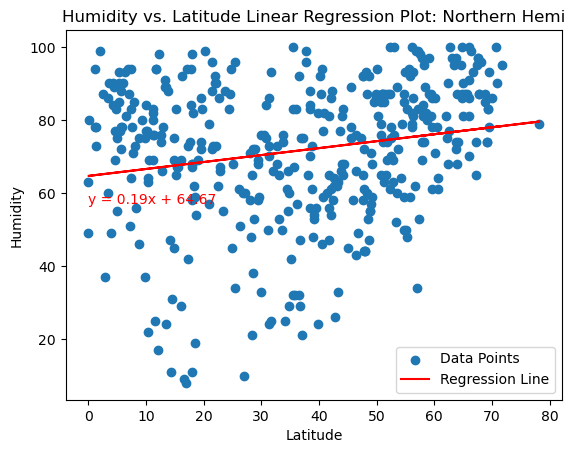

In [36]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],'Humidity vs. Latitude Linear Regression Plot: Northern Hemi' ,'Latitude', 'Humidity', 0, 57)

The r value is: -0.06902274025822593


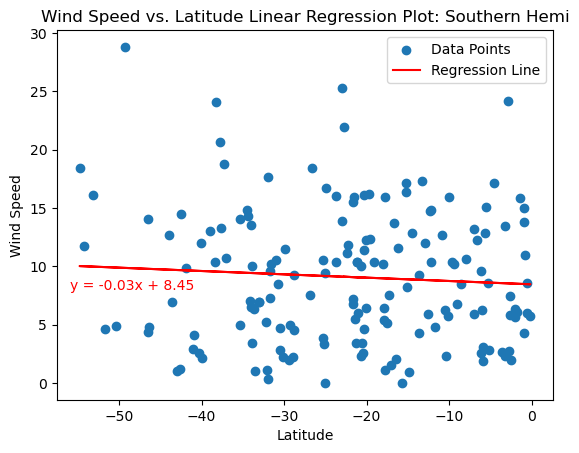

In [39]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],'Wind Speed vs. Latitude Linear Regression Plot: Southern Hemi' ,'Latitude', 'Wind Speed', -56, 8)

### Discussion about the linear relationship:

- **Southern Hemisphere (r ≈ -0.0214):**
The r-value is very close to zero and negative. This suggests a very weak and almost negligible negative linear relationship between latitude and wind speed in the southern hemisphere. In other words, as you move farther from the equator (higher latitudes), there is a minimal tendency for wind speed to decrease, but this relationship is very weak.

- **Northern Hemisphere (r ≈ 0.1395):**
The r-value is positive and larger than the one in the southern hemisphere. It indicates a weak positive linear relationship between latitude and wind speed in the northern hemisphere. As you move away from the equator and towards higher latitudes, there is a slight tendency for wind speed to increase, but again, this relationship is weak.

In both hemispheres, the r-values are close to zero, which suggests that latitude has a very weak influence on wind speed. 